In [22]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation 

In [23]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv() 

True

In [24]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
) 

In [25]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-30", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["IYR","SPY"]

# Get 3 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

IYR                                       SPY  \
                            open     high    low  close     volume    open   
time                                                                         
2020-08-06 00:00:00-04:00  81.46  81.9900  81.22  81.73  5935917.0     NaN   
2020-08-07 00:00:00-04:00  81.46  82.8550  81.33  82.84  7524863.0     NaN   
2020-08-10 00:00:00-04:00  83.00  83.5000  82.60  83.00  7873573.0  335.06   
2020-08-11 00:00:00-04:00  83.95  83.9500  81.54  81.82  7536012.0  336.85   
2020-08-12 00:00:00-04:00  82.35  82.7599  82.11  82.64  5231655.0  335.44   

                                                                  
                             high       low   close       volume  
time                                                              
2020-08-06 00:00:00-04:00     NaN       NaN     NaN          NaN  
2020-08-07 00:00:00-04:00     NaN       NaN     NaN          NaN  
2020-08-10 00:00:00-04:00  335.77  332.9550  335.55   76546162.0  
2020-08-11 00:00:00-04:00  337.54  332.0100  332.82  117799447.0  
2020-08-12 00:00:00-04:00  338.28  332.8377  337.42   91230107.0

In [26]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

IYR                                    \
                            open     high    low  close     volume   
time                                                                 
2020-08-06 00:00:00-04:00  81.46  81.9900  81.22  81.73  5935917.0   
2020-08-07 00:00:00-04:00  81.46  82.8550  81.33  82.84  7524863.0   
2020-08-10 00:00:00-04:00  83.00  83.5000  82.60  83.00  7873573.0   
2020-08-11 00:00:00-04:00  83.95  83.9500  81.54  81.82  7536012.0   
2020-08-12 00:00:00-04:00  82.35  82.7599  82.11  82.64  5231655.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2020-08-06 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2020-08-07 00:00:00-04:00     0.013581     NaN     NaN       NaN     NaN   
2020-08-10 00:00:00-04:00     0.001931  335.06  335.77  332.9550  335.55   
2020-08-11 00:00:00-04:00    -0.014217  336.85  337.54  332.0100  332.82   
2020-08-12 00:00:00-04:00     0.010022  335.44  338.28  332.8377  337.42   

                                                     
                                volume daily_return  
time                                                 
2020-08-06 00:00:00-04:00          NaN          NaN  
2020-08-07 00:00:00-04:00          NaN          NaN  
2020-08-10 00:00:00-04:00   76546162.0          NaN  
2020-08-11 00:00:00-04:00  117799447.0    -0.008136  
2020-08-12 00:00:00-04:00   91230107.0     0.013821

In [28]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995454,1.010558,1.002565,0.987340,0.991589,1.009785,1.003139,1.009632,0.999860,1.005149,...,1.013928,0.986242,1.004410,1.004597,1.006288,0.998718,1.009848,1.000064,1.005316,1.014444
2,0.994850,1.022050,0.999704,0.999042,1.003844,0.995342,0.998465,1.009441,1.000323,0.994759,...,1.008466,0.981404,1.003369,1.002966,0.998051,1.022454,1.012314,1.007642,1.004365,1.012845
3,0.998310,1.018789,0.993467,0.997428,0.992373,1.002729,0.998872,1.006704,1.008507,0.985074,...,0.990729,0.991113,1.011022,1.004425,0.998510,1.017989,1.012020,1.012181,1.015443,1.006959
4,0.998763,1.019198,1.008322,0.999654,0.995593,1.004635,1.009292,0.999268,1.000405,0.996202,...,1.011293,0.978477,1.012298,1.008284,0.991045,1.029851,1.022466,1.022944,1.018770,0.999677
5,0.995924,1.026225,1.000556,1.010380,0.996339,1.001595,1.022510,1.003204,1.005253,1.014479,...,1.022678,0.978038,1.019080,1.004275,0.979744,1.045877,1.023678,1.009953,1.018346,0.999789
6,0.979118,1.011089,0.994172,1.008600,1.009397,1.006899,1.020993,0.997841,1.010997,1.009414,...,1.023335,0.968366,1.019941,1.003020,0.988964,1.029136,1.025962,1.016598,1.028220,1.003889
7,0.988651,1.024469,0.992640,1.005386,1.010277,1.008925,1.017335,1.004612,1.016495,1.021879,...,1.000745,0.959706,1.019167,0.994921,1.000306,1.051116,1.023093,1.011680,1.045975,0.993454
8,0.992741,1.039830,0.974642,0.999696,1.011056,1.018281,1.021800,1.018004,1.003422,1.029240,...,1.001629,0.958298,0.997972,1.027001,0.993352,1.051935,1.021825,1.010491,1.051660,0.985620
9,0.987015,1.052038,0.985974,1.008017,1.011481,1.012305,1.017861,1.010027,1.005660,1.033646,...,0.983787,0.962065,1.000202,1.030680,0.992535,1.064161,1.037871,1.005500,1.050811,0.988256


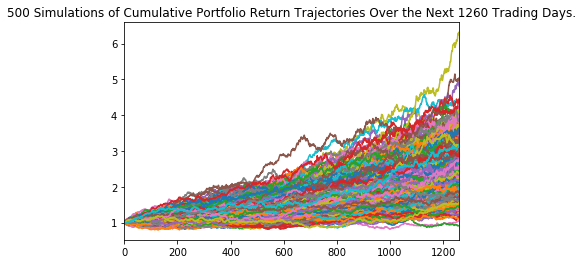

In [29]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

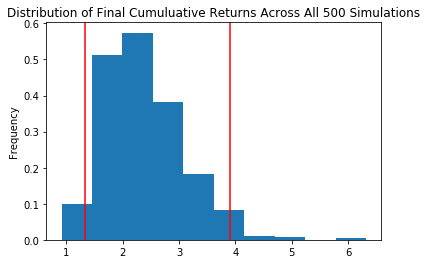

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.387393
std               0.697825
min               0.918166
25%               1.883499
50%               2.265057
75%               2.843858
max               6.316270
95% CI Lower      1.330214
95% CI Upper      3.908361
Name: 1260, dtype: float64


In [33]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in IYR and SPY ETFs
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $13302.14 and $39083.61
